In [1]:
!pip install pyCalor

  Using cached pycalor-1.0.7-py3-none-any.whl.metadata (3.6 kB)
  Using cached coolprop-7.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (282 bytes)
  Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached pycalor-1.0.7-py3-none-any.whl (22 kB)
Using cached coolprop-7.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.8 MB)
Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pyCalor]m2/4 [igraph]p]


In [2]:
from pyCalor import thermo as th
import numpy as np
import matplotlib.pyplot as plt

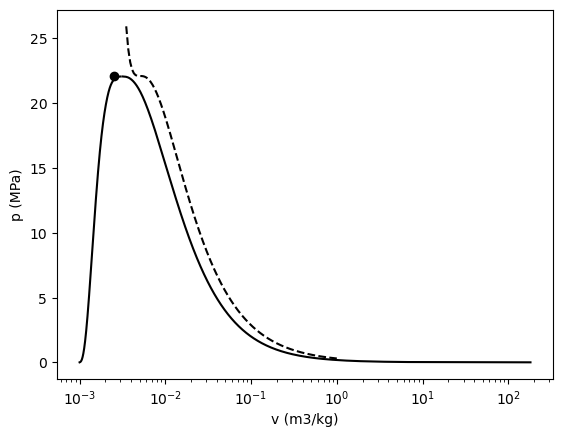

In [34]:
plt.figure()
plt.clf()
Tc_K = 647.1 
pc_Pa = 22.1e6

Ttp_K = 273.16
ptp_Pa = 611.6

stcritical = th.state('Water', p=pc_Pa/1e3, T=Tc_K, name="1")

plt.xscale("log")
plt.plot(stcritical.v,stcritical.P/1000, marker = "o", color="black")

P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
#for T in [Ttp_K+5, T1_K, T1_K+100, T1_K+200]: #K
#    st = [th.state('Water', p=p*1e3, T=T) for p in P]
#    v = [s.v for s in st]
#    plt.xscale("log")
#    plt.plot(v, P, 'k--')

vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

plt.xscale("log")
#plt.plot(v1,p1_MPa, marker = 10)

plt.xlabel('v (m3/kg)')
plt.ylabel('p (MPa)')
#plt.savefig('iawps-steam-p-v-diagram.png')

R_JperKgPerK = 461.5
a = (27 * (R_JperKgPerK**2) * (Tc_K**2))/(64 * pc_Pa)
b = (R_JperKgPerK* Tc_K)/(8 * pc_Pa)

v_ = np.linspace(0.35e-2, 1, 5000)

# p*v - p*b + (a/v**2)*v - a*b/v**2 = R*T
p_  = (R_JperKgPerK*Tc_K - (a/v_**2)*v_ + a*b/v_**2)/(v_ - b)

plt.plot(v_, p_/1e6, 'k--')